In [1]:
# import librairies 

import tensorflow as tf 
from tensorflow import keras 

import numpy as np 
import matplotlib.pyplot as plt 

2024-08-05 17:45:50.091493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-05 17:45:50.094490: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-05 17:45:50.104018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 17:45:50.120265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 17:45:50.124911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-05 17:45:50.136669: I tensorflow/core/platform/cpu_feature_gu

In [2]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

In the dataset, each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them here so that we can use them later when viewing the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### preprocess the data

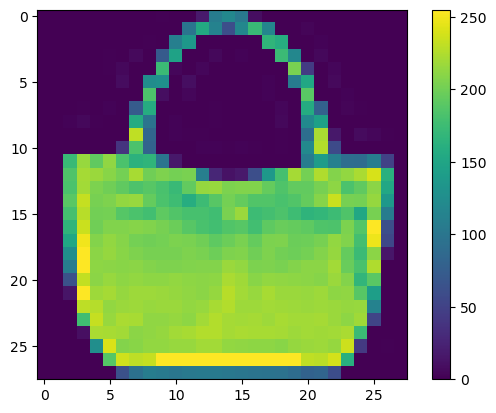

In [4]:
# we will inspect a frame of the training set
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#scale the values between 0 and 1 -divide the values by 255 

train_images = train_images/255.0
test_images = test_images/255.0

- for the verification that the data is in the correct format and ready to train the neural network we will display the first 25 images of the training set and display the name of the class under each image

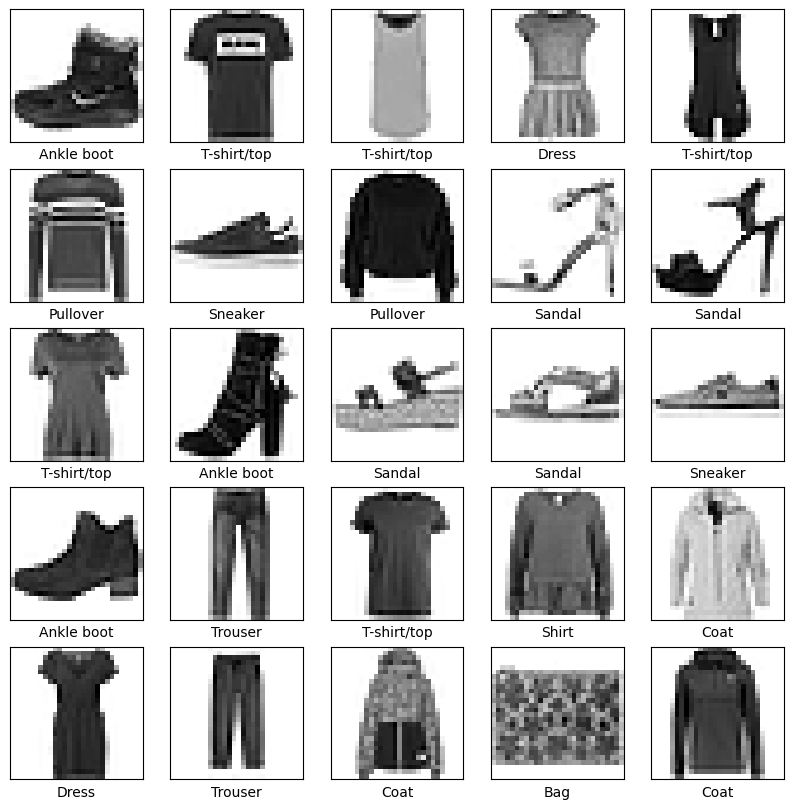

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### build the model 

In [7]:

# setting up the layers 

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/home/amira/anaconda3/envs/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- about the architecture : 

Input Layer: Accepts 28x28 grayscale images.

First Convolutional Layer: 32 filters of size 3x3, ReLU activation.

First Max-Pooling Layer: Pool size of 2x2.

Second Convolutional Layer: 64 filters of size 3x3, ReLU activation.

Second Max-Pooling Layer: Pool size of 2x2.

Flatten Layer: Converts the 2D matrix to a 1D vector.

Dense (Fully Connected) Layer: 128 neurons, ReLU activation.

Output Layer: 10 neurons with a softmax activation for multi-class classification.

In [8]:

# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# train the model 
model.fit(train_images,train_labels,epochs=10)

# evaluation 
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10


2024-08-05 17:46:12.130712: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7764 - loss: 0.6149
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8868 - loss: 0.3069
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9016 - loss: 0.2591
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9154 - loss: 0.2281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9247 - loss: 0.1984
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9361 - loss: 0.1685
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9427 - loss: 0.1535
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9506 - loss: 0.1326
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9560 - loss: 0.1180
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9623 - loss: 0.0989
313/313 - 1s - 3ms/step - accuracy: 0.9112 - loss: 0.2854

Test accuracy: 0.9111999869346619


In [14]:
# make predictions 

predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9.9590163e-11, 4.7504513e-12, 4.1695015e-11, 5.9729288e-09,
       3.0812026e-14, 1.3814766e-07, 2.0181246e-11, 4.5421089e-06,
       2.1872008e-11, 9.9999529e-01], dtype=float32)

note :  if there are 10 classes, then predictions[i] will be an array of 10 elements, where each element represents the probability of the i-th test image belonging to that class (in other words it is the 'confidence' of the model that the image matches each of the 10different classes).

In [15]:
np.argmax(predictions[0])

9

In [11]:
test_labels[0]

9

In [16]:
# we will display the image and plot our prediction for it 
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

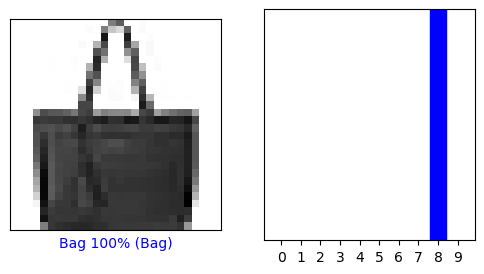

In [17]:
i = 900
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

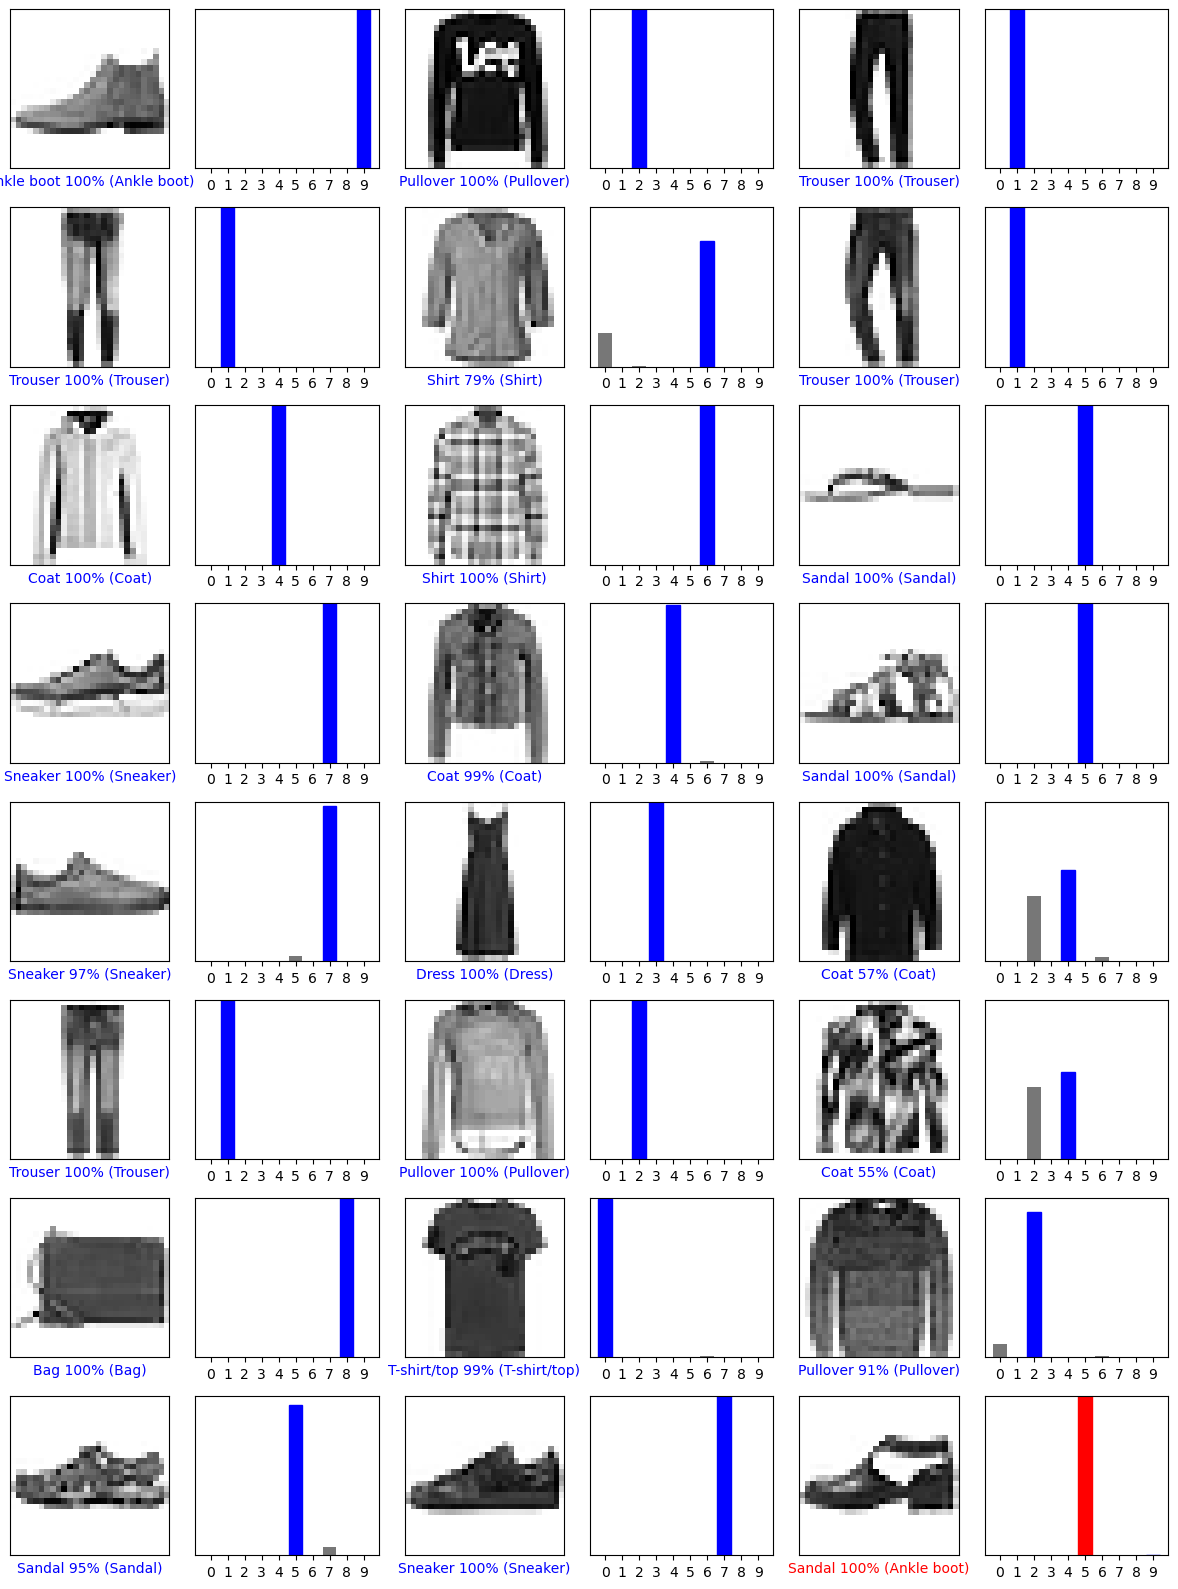

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

- This model is way better !